## Solow model 

This file solves the Solow model, for a given set of parameters values. It also compares the transitions to the steady state between the Ramsey and the Solow model.

Savings rate:  0.23529411764705876
Solow level of capital:  3.6092470063405657
Ramsey level of capital:  3.6092470063405626
Golden rule level for k in Solow:  3.6092470063405626


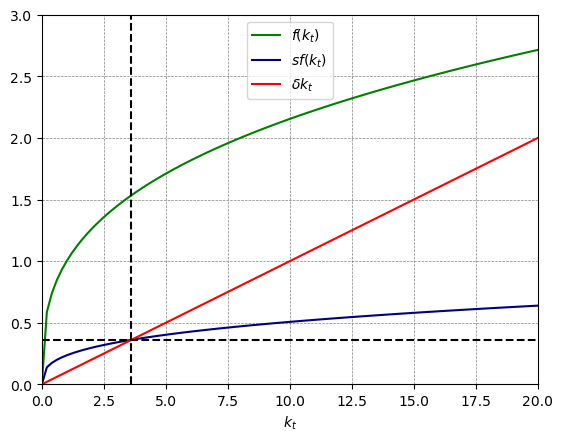

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize

## Production function
def f(k,α):
    out = k**α
    return out

## Derivative of prod fctn
def fp(k,α):
    out = α * k**(α-1)
    return out

## Utility function
def u(c,σ):
    out = c**(1-σ)-1/(1-σ)
    return out

α = 1/3
σ = 1.0001
δ = 0.1
β = 0.96

kmax = 20
knum = 100

## Ramsy steady state
k_ram = ((1/β-1+ δ)/α)**(1/(α-1))
c_ram = f(k_ram,α) - δ*k_ram

## This is the savings rate in the Ramsey model, given preferences
s_ram = 1-c_ram/f(k_ram,α)
print('Savings rate: ',s_ram)

## Construct a Solow model with the same savings rate as the Ramsey model
kvec = np.linspace(0,kmax,knum)
plt.plot(kvec,f(kvec,α), label= r'$f(k_t)$', color = 'green')
plt.plot(kvec,s_ram*f(kvec,α), label= r'$s f(k_t)$', color = 'navy')
plt.plot(kvec,δ*kvec, label= r'$\delta k_t$' , color = 'red')
plt.grid(color = 'grey', linestyle = '--', linewidth = 0.5)
plt.xlabel(r'$k_t$')
plt.ylim(0,3)
plt.xlim(0,20)
plt.legend()

## Find the solution to optimal level of capital in the Solow model using a solver:
def sol_ow(guess,α,δ,s):
    diff = δ*guess-s*f(guess,α)
    return diff
## Golden rule levels of capital
kopt = optimize.newton(sol_ow, 1, args=(α,δ,s_ram)) ## Solver's solution
k_gr = (δ/α)**(1/(α-1)) ## 

print("Solow level of capital: ", kopt)
print("Ramsey level of capital: ", k_ram)
print("Golden rule level for k in Solow: ", k_ram)

plt.axvline(kopt, linestyle = '--', color = 'black')
plt.axhline(s_ram*f(kopt,α), linestyle = '--', color = 'black')
plt.savefig('solow_graph.pdf')        
#plt.close()

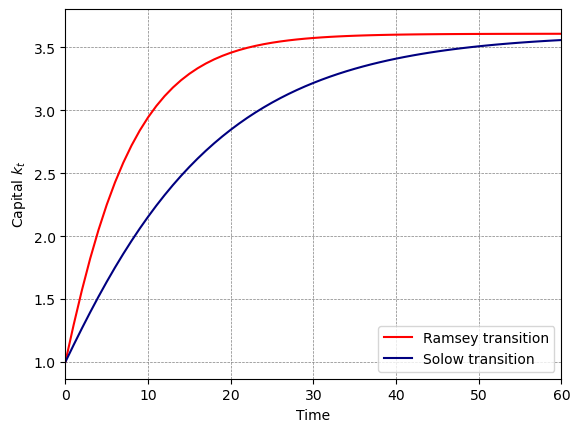

In [5]:
## Transition to steady state

## This is a bisection search for c0, to find the transition path for the Ramsey model
def trans_ram(k0,c0,num,maxk,maxc):
    cvec = np.zeros(num)
    kvec = np.zeros(num)
    
    cvec[0] = c0
    kvec[0] = k0
    for i in range(num-1):
        kk = kvec[i]
        cc = cvec[i]
        kvec[i+1] = (1-δ)*kk + f(kk,α) - cc

        cvec[i+1] = ( cc**(-σ) / (β*(1+fp(kvec[i+1],α)-δ)) ) ** (-1/σ)
        if kvec[i+1]>maxk:
            break
        if cvec[i+1]>maxc:
            break
    ## Drop points outside the allowed area
    cvec = cvec[cvec>0]
    kvec = kvec[kvec>0]
    return cvec, kvec

## This computes the transition in the Solow model, entirely deterministic
def trans_sol(k0,s,num,maxk):
    kvec = np.zeros(num)
    
    kvec[0] = k0
    for i in range(num-1):
        kk = kvec[i]
        
        kvec[i+1] = (1-δ)*kk + s*f(kk,α)
        if kvec[i+1]>maxk:
            break
    return kvec

k0 = 1
_,ktrans_ram = trans_ram(k0, .6044732441485393,100,10,10)
plt.plot(ktrans_ram, color = 'red', label = 'Ramsey transition')

ktrans_sol= trans_sol(k0,s_ram,100,10)
plt.plot(ktrans_sol, color = 'navy', label = 'Solow transition')
plt.grid(color = 'grey', linestyle = '--', linewidth = 0.5)
plt.xlim(0,60)
plt.xlabel('Time')
plt.ylabel(r'Capital $k_t$')
plt.legend()
plt.savefig('trans_comp.pdf')        
plt.show()

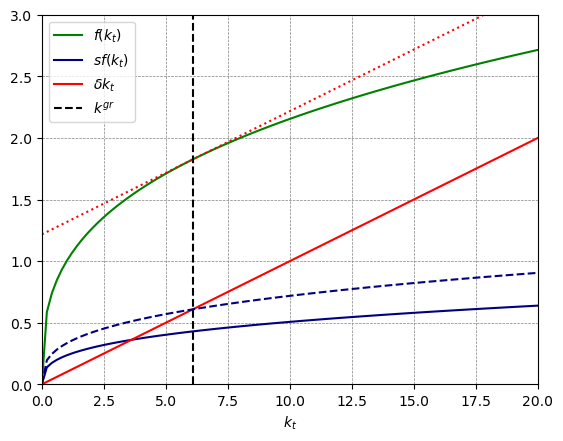

In [6]:
## Golden rule
plt.plot(kvec,f(kvec,α), label= r'$f(k_t)$', color = 'green')
plt.plot(kvec,s_ram*f(kvec,α), label= r'$s f(k_t)$', color = 'navy')
plt.plot(kvec,δ*kvec, label= r'$\delta k_t$' , color = 'red')
plt.grid(color = 'grey', linestyle = '--', linewidth = 0.5)
plt.xlabel(r'$k_t$')
plt.axvline(k_gr, linestyle = '--', color = 'black', label = r'$k^{gr}$')
plt.legend()
s_gr = δ * k_gr/f(k_gr,α)
plt.plot(kvec,s_gr*f(kvec,α), linestyle = 'dashed', color = 'navy')
MPKline = δ*kvec+ f(k_gr,α)-k_gr* δ
 
plt.plot(kvec,MPKline, linestyle = 'dotted', color = 'red')
plt.ylim(0,3)
plt.xlim(0,20)
plt.savefig('solow_gr.pdf')        
plt.show()
